In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
from datetime import datetime, date
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager

import geopandas
import branca.colormap as cm
from branca.element import Template, MacroElement
import folium
from folium import plugins

In [2]:
# mac os
font_path = '/Library/Fonts/simhei.ttf'
fontP = font_manager.FontProperties(fname=font_path)
fontP.set_size(16)
fontP_12 = font_manager.FontProperties(fname=font_path)
fontP_12.set_size(12)


## Import datasets

In [3]:
reactions_df = pd.read_csv('datasets/Reactions COVID-19 Vaccine - vaccine x reactions 2 doses.csv')

reactions_df = reactions_df.sort_values(
    ['vaccine_order']).sort_values(['reaction_order', 'dose1_pct']).reset_index(drop=True) # dose1_pct

reactions_df = reactions_df[~((reactions_df['reaction'] == 'Headache') & (reactions_df['reaction_cn'] == '发热'))]

## Visu

In [4]:
def viz_detail_reactions(axarr_left, axarr_right, df, reaction_list, width, yticklabels, color_list, loc=1):
    reaction_df = df[(df['reaction_cn'].isin(reaction_list))]

    # first dose
    axarr_left.set_yticklabels([])
    axarr_left.set_yticks([])
    axarr_left.invert_yaxis()
    axarr_left.invert_xaxis()

    axarrL_2 = axarr_left.twinx()
    barh_l1 = axarrL_2.barh(np.arange(len(reaction_list)) +  width/2 * 3,
                            reaction_df[reaction_df['vaccine_cn'] == '科兴']['dose1_pct'],
                            height=width, color=color_list[0])
    barh_l2 = axarrL_2.barh(np.arange(len(reaction_list)) +  width/2,
                            reaction_df[reaction_df['vaccine_cn'] == '莫德纳']['dose1_pct'],
                            height=width, color=color_list[1])
    barh_l3 = axarrL_2.barh(np.arange(len(reaction_list)) -  width/2,
                            reaction_df[reaction_df['vaccine_cn'] == '辉瑞-生物科技']['dose1_pct'],
                            height=width, color=color_list[2])
    barh_l4 = axarrL_2.barh(np.arange(len(reaction_list)) -  width/2 * 3,
                            reaction_df[reaction_df['vaccine_cn'] == '阿斯利康']['dose1_pct'],
                            height=width, color=color_list[3])

    axarr_left.tick_params(axis='x', labelsize=16)
    axarr_left.xaxis.tick_top()
    axarr_left.xaxis.set_label_position('top')
    axarr_left.set_xlabel('第一针（百分比）', size=16, labelpad=7, fontproperties=fontP)
    axarrL_2.set_xlim(100, 0)
    axarrL_2.set_yticks(np.arange(len(reaction_list)))
    axarrL_2.set_yticklabels([])
    axarr_left.grid(which='major', axis='x', alpha=0.5)


    # second dose
    barh_r1 = axarr_right.barh(np.arange(len(reaction_list)) +  width/2 * 3,
                               reaction_df[reaction_df['vaccine_cn'] == '科兴']['dose2_pct'],
                               height=width, color=color_list[0])
    barh_r2 = axarr_right.barh(np.arange(len(reaction_list)) +  width/2,
                               reaction_df[reaction_df['vaccine_cn'] == '莫德纳']['dose2_pct'],
                               height=width, color=color_list[1])
    barh_r3 = axarr_right.barh(np.arange(len(reaction_list)) -  width/2,
                               reaction_df[reaction_df['vaccine_cn'] == '辉瑞-生物科技']['dose2_pct'],
                               height=width, color=color_list[2])
    barh_r4 = axarr_right.barh(np.arange(len(reaction_list)) -  width/2 * 3,
                               reaction_df[reaction_df['vaccine_cn'] == '阿斯利康']['dose2_pct'],
                               height=width, color=color_list[3])

    axarr_right.tick_params(axis='x', labelsize=16)
    axarr_right.set_xlim(0, 100)
    axarr_right.xaxis.tick_top()
    axarr_right.xaxis.set_label_position('top')
    axarr_right.set_xlabel('第二针（百分比）', size=16, labelpad=7, fontproperties=fontP)
    axarr_right.set_yticks(np.arange(len(reaction_list)))
    axarr_right.set_yticklabels(yticklabels, fontproperties=fontP)
    axarr_right.grid(which='major', axis='x', alpha=0.5)
    axarr_right.set_axisbelow(True)

    axarr_right.legend(handles=(barh_r1, barh_r2, barh_r3, barh_r4),
                       labels=('科兴', '莫德纳', '辉瑞-生物科技', '阿斯利康'),
                       loc=loc,
                       prop=fontP
                      )



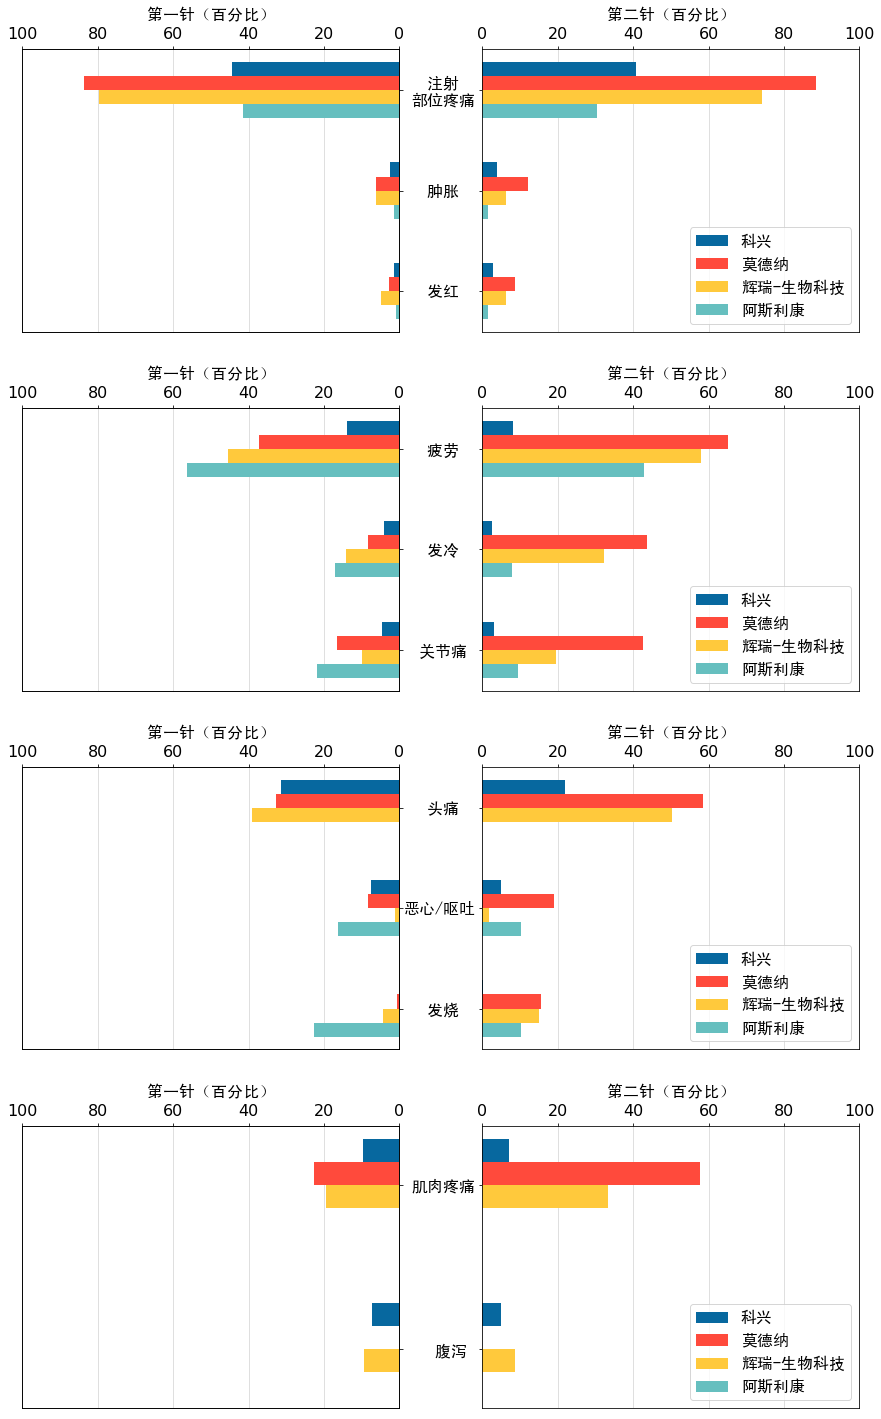

In [5]:
fig, axarr = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
width3 = 0.14

viz_detail_reactions(axarr_left=axarr[0, 0], axarr_right=axarr[0, 1], df=reactions_df,
                     reaction_list=['注射部位疼痛', '肿胀', '发红'], width=width3,
                     yticklabels=['  发红  ', '  肿胀  ', '注射  \n部位疼痛'],
                     color_list=['#07689f', '#ff4a3c', '#ffc93c', '#66bfbf'], loc=4)
viz_detail_reactions(axarr_left=axarr[1, 0], axarr_right=axarr[1, 1], df=reactions_df,
                     reaction_list=['发冷', '疲劳', '关节痛'], width=width3,
                     yticklabels=['关节痛 ',  '发冷  ', '疲劳  '],
                     color_list=['#07689f', '#ff4a3c', '#ffc93c', '#66bfbf'], loc=4)
viz_detail_reactions(axarr_left=axarr[2, 0], axarr_right=axarr[2, 1], df=reactions_df,
                     reaction_list=['头痛', '恶心/呕吐', '发烧'], width=width3,
                     yticklabels=['发烧  ', '恶心/呕吐', '头痛  '],
                     color_list=['#07689f', '#ff4a3c', '#ffc93c', '#66bfbf'], loc=4)
viz_detail_reactions(axarr_left=axarr[3, 0], axarr_right=axarr[3, 1], df=reactions_df,
                     reaction_list=['肌肉疼痛', '腹泻'], width=width3,
                     yticklabels=[' 腹泻 ', '肌肉疼痛'],
                     color_list=['#07689f', '#ff4a3c', '#ffc93c', '#66bfbf'], loc=4)


plt.subplots_adjust(wspace=0.22, hspace=0.27)

In [6]:
def viz_detail_reactions_en(axarr_left, axarr_right, df, reaction_list, width, yticklabels, color_list, loc=1):
    reaction_df = df[(df['reaction'].isin(reaction_list))]

    # first dose
    axarr_left.set_yticklabels([])
    axarr_left.set_yticks([])
    axarr_left.invert_yaxis()
    axarr_left.invert_xaxis()

    axarrL_2 = axarr_left.twinx()
    barh_l1 = axarrL_2.barh(np.arange(len(reaction_list)) +  width/2 * 3,
                            reaction_df[reaction_df['vaccine_cn'] == '科兴']['dose1_pct'],
                            height=width, color=color_list[0])
    barh_l2 = axarrL_2.barh(np.arange(len(reaction_list)) +  width/2,
                            reaction_df[reaction_df['vaccine_cn'] == '莫德纳']['dose1_pct'],
                            height=width, color=color_list[1])
    barh_l3 = axarrL_2.barh(np.arange(len(reaction_list)) -  width/2,
                            reaction_df[reaction_df['vaccine_cn'] == '辉瑞-生物科技']['dose1_pct'],
                            height=width, color=color_list[2])
    barh_l4 = axarrL_2.barh(np.arange(len(reaction_list)) -  width/2 * 3,
                            reaction_df[reaction_df['vaccine_cn'] == '阿斯利康']['dose1_pct'],
                            height=width, color=color_list[3])

    axarr_left.tick_params(axis='x', labelsize=13)
    axarr_left.xaxis.tick_top()
    axarr_left.xaxis.set_label_position('top')
    axarr_left.set_xlabel('First dose (percentage)', size=13, labelpad=7)
    axarrL_2.set_xlim(100, 0)
    axarrL_2.set_yticks(np.arange(len(reaction_list)))
    axarrL_2.set_yticklabels([])
    axarr_left.grid(which='major', axis='x', alpha=0.5)


    # second dose
    barh_r1 = axarr_right.barh(np.arange(len(reaction_list)) +  width/2 * 3,
                               reaction_df[reaction_df['vaccine_cn'] == '科兴']['dose2_pct'],
                               height=width, color=color_list[0])
    barh_r2 = axarr_right.barh(np.arange(len(reaction_list)) +  width/2,
                               reaction_df[reaction_df['vaccine_cn'] == '莫德纳']['dose2_pct'],
                               height=width, color=color_list[1])
    barh_r3 = axarr_right.barh(np.arange(len(reaction_list)) -  width/2,
                               reaction_df[reaction_df['vaccine_cn'] == '辉瑞-生物科技']['dose2_pct'],
                               height=width, color=color_list[2])
    barh_r4 = axarr_right.barh(np.arange(len(reaction_list)) -  width/2 * 3,
                               reaction_df[reaction_df['vaccine_cn'] == '阿斯利康']['dose2_pct'],
                               height=width, color=color_list[3])

    axarr_right.tick_params(axis='x', labelsize=13)
    axarr_right.set_xlim(0, 100)
    axarr_right.xaxis.tick_top()
    axarr_right.xaxis.set_label_position('top')
    axarr_right.set_xlabel('Second dose (percentage)', size=13, labelpad=7)
    axarr_right.set_yticks(np.arange(len(reaction_list)))
    axarr_right.set_yticklabels(yticklabels, size=13)
    axarr_right.grid(which='major', axis='x', alpha=0.5)
    axarr_right.set_axisbelow(True)

    axarr_right.legend(handles=(barh_r1, barh_r2, barh_r3, barh_r4),
                       labels=('Coronavac', 'Moderna', 'Pfizer-BioNTech', 'AstraZenaca'),
                       loc=loc,
                       fontsize=13
                      )



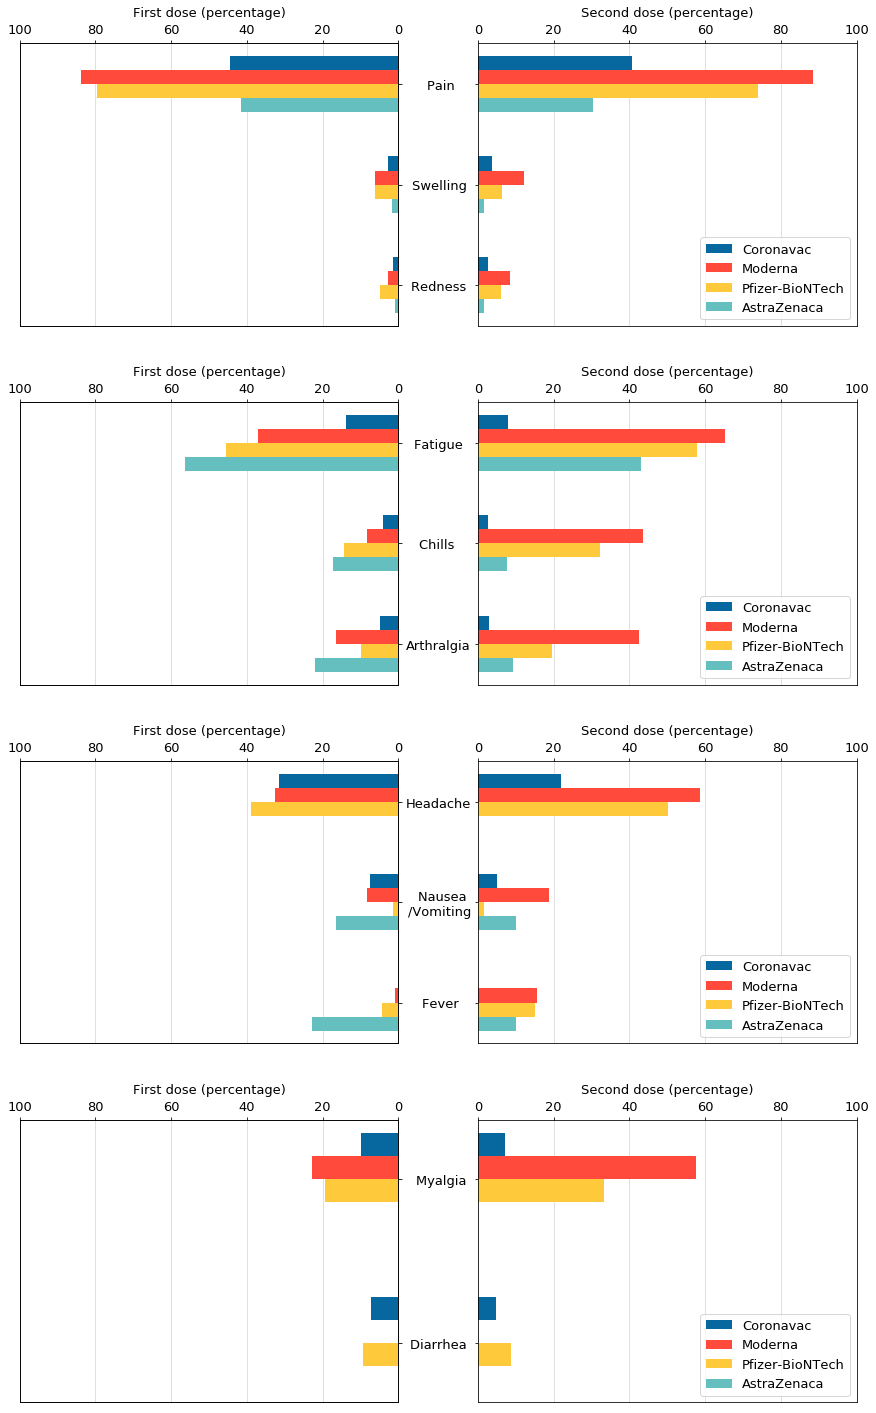

In [7]:
fig, axarr = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
width3 = 0.14

viz_detail_reactions_en(axarr_left=axarr[0, 0], axarr_right=axarr[0, 1], df=reactions_df,
                     reaction_list=['Pain', 'Swelling', 'Redness'], width=width3,
                     yticklabels=['Redness ', 'Swelling ', 'Pain    '],
                     color_list=['#07689f', '#ff4a3c', '#ffc93c', '#66bfbf'], loc=4)
viz_detail_reactions_en(axarr_left=axarr[1, 0], axarr_right=axarr[1, 1], df=reactions_df,
                     reaction_list=['Chills', 'Fatigue', 'Arthralgia'], width=width3,
                     yticklabels=['Arthralgia',  'Chills    ', 'Fatigue  '],
                     color_list=['#07689f', '#ff4a3c', '#ffc93c', '#66bfbf'], loc=4)
viz_detail_reactions_en(axarr_left=axarr[2, 0], axarr_right=axarr[2, 1], df=reactions_df,
                     reaction_list=['Headache', 'Nausea/Vomiting', 'Fever'], width=width3,
                     yticklabels=['Fever   ', 'Nausea \n/Vomiting', 'Headache'],
                     color_list=['#07689f', '#ff4a3c', '#ffc93c', '#66bfbf'], loc=4)
viz_detail_reactions_en(axarr_left=axarr[3, 0], axarr_right=axarr[3, 1], df=reactions_df,
                     reaction_list=['Myalgia', 'Diarrhea'], width=width3,
                     yticklabels=['Diarrhea ', 'Myalgia '],
                     color_list=['#07689f', '#ff4a3c', '#ffc93c', '#66bfbf'], loc=4)


plt.subplots_adjust(wspace=0.21, hspace=0.27)